<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

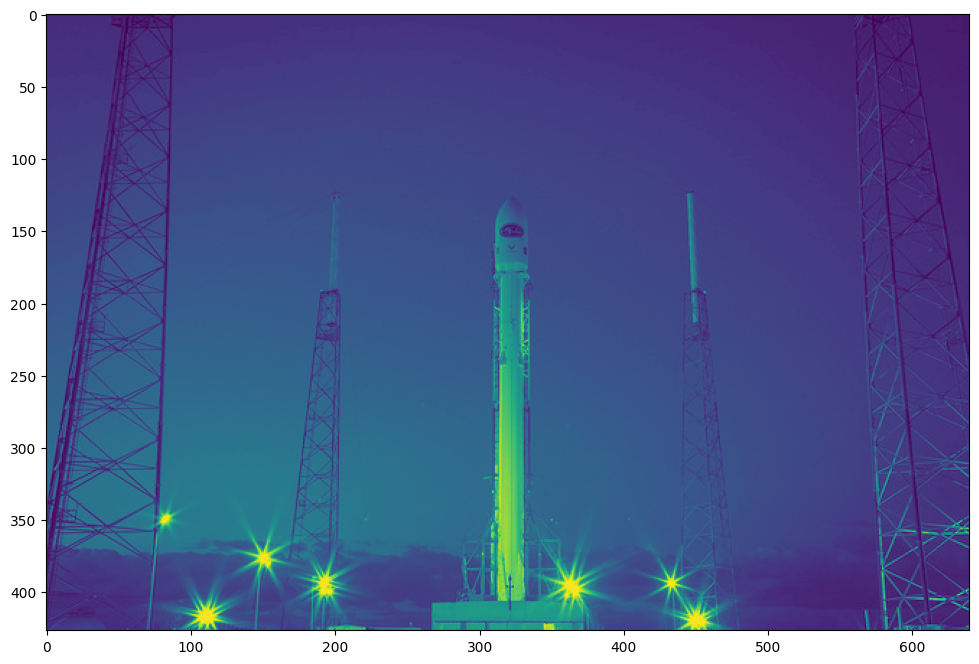

In [27]:
# code
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.filters import sobel
from skimage import data, morphology
from skimage.color import rgb2gray, label2rgb
from skimage.segmentation import watershed
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

# load images and convert grayscale
rocket = data.rocket()
rocket_wh = rgb2gray(rocket)

plt.imshow(rocket_wh)

Text(0.5, 1.0, 'Canny detector')

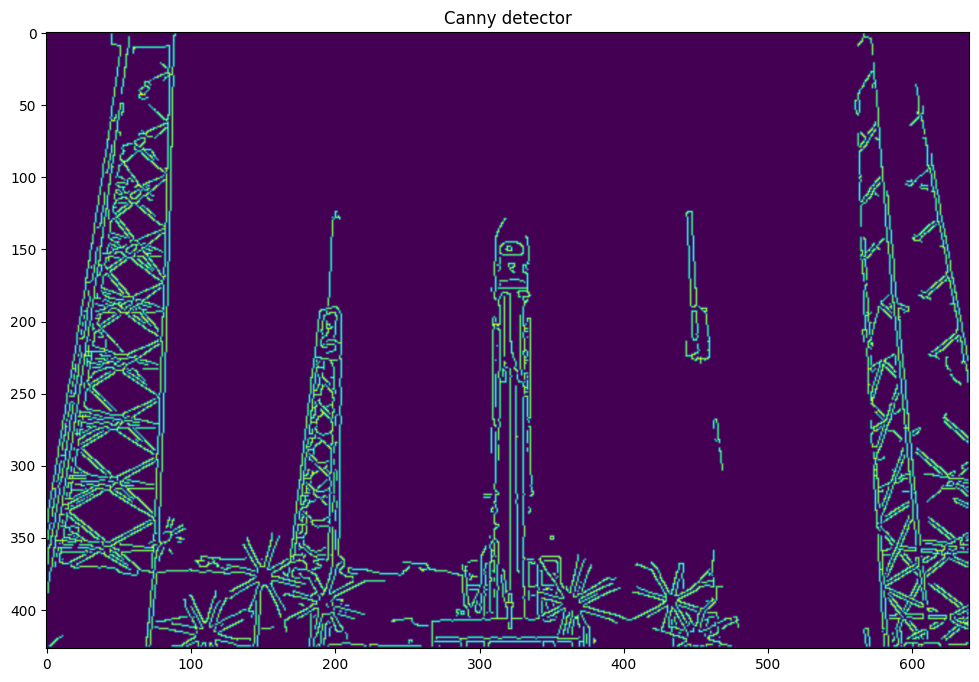

In [12]:
# apply edge segmentation
# plot canny edge detection
edges = canny(rocket_wh)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')

Text(0.5, 1.0, 'Region Filling')

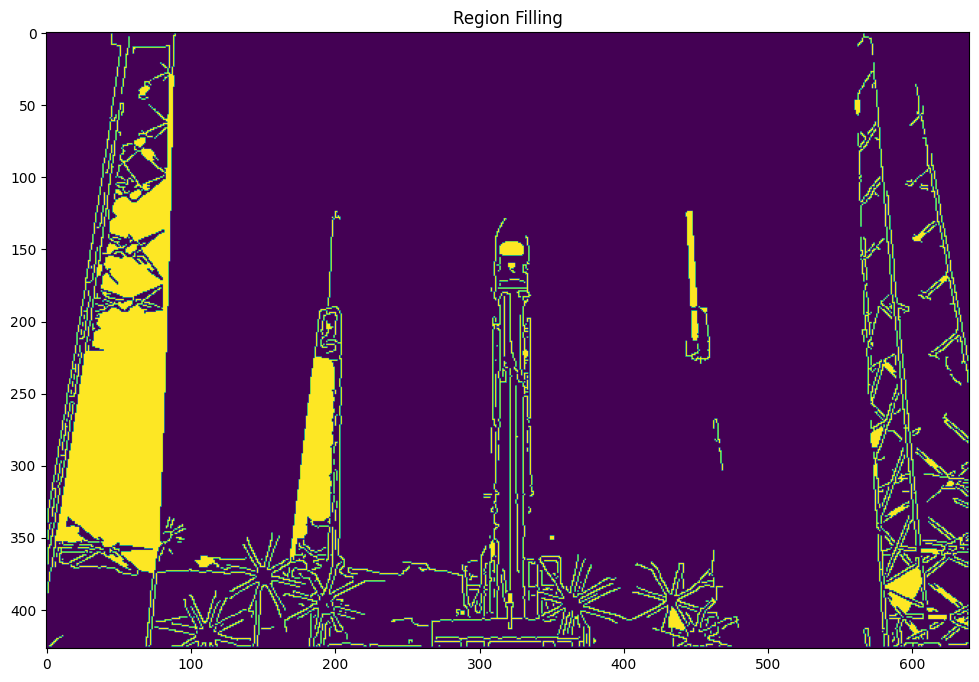

In [13]:
# fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')

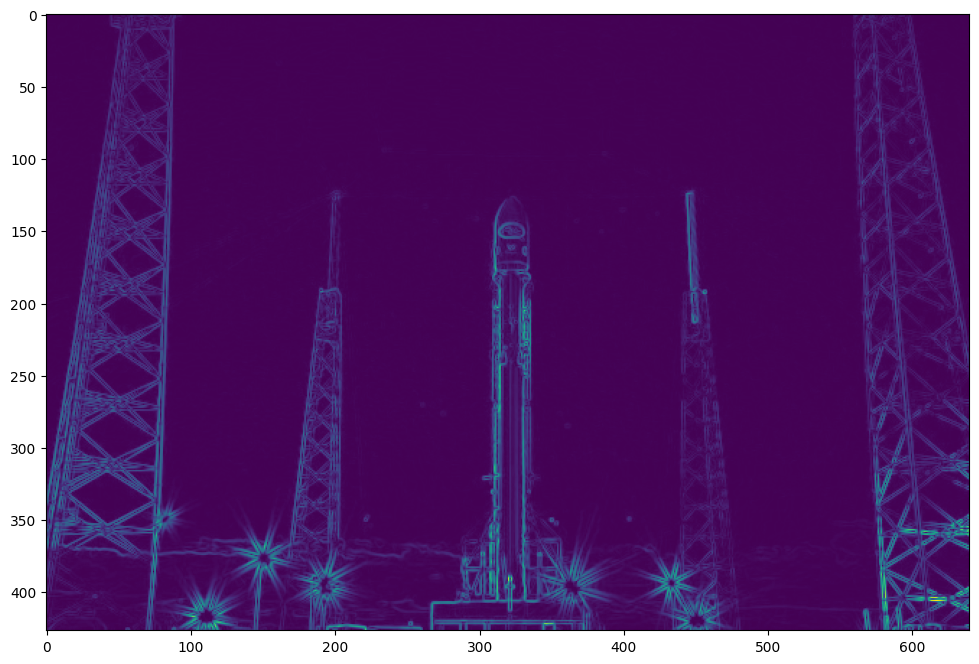

In [14]:
# Region Segmentation
# First we print the elevation map
elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)

Text(0.5, 1.0, 'markers')

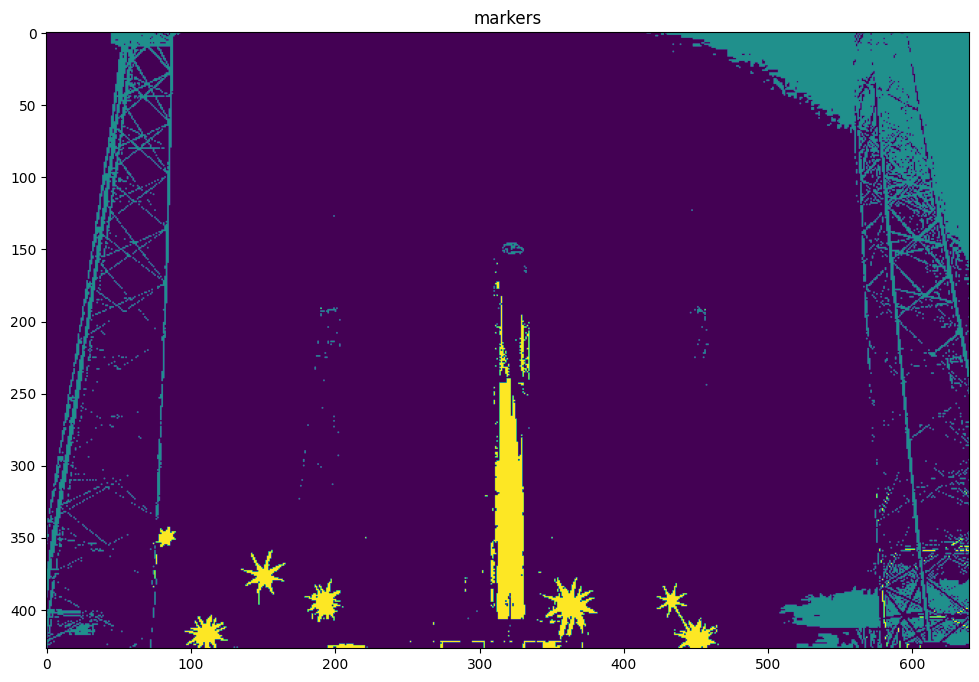

In [16]:
# Since, the contrast difference is not much. Anyways we will perform it
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1 # 30/255
markers[rocket_wh > 0.5859375] = 2 # 150/255

plt.imshow(markers)
plt.title('markers')

Text(0.5, 1.0, 'Watershed segmentation')

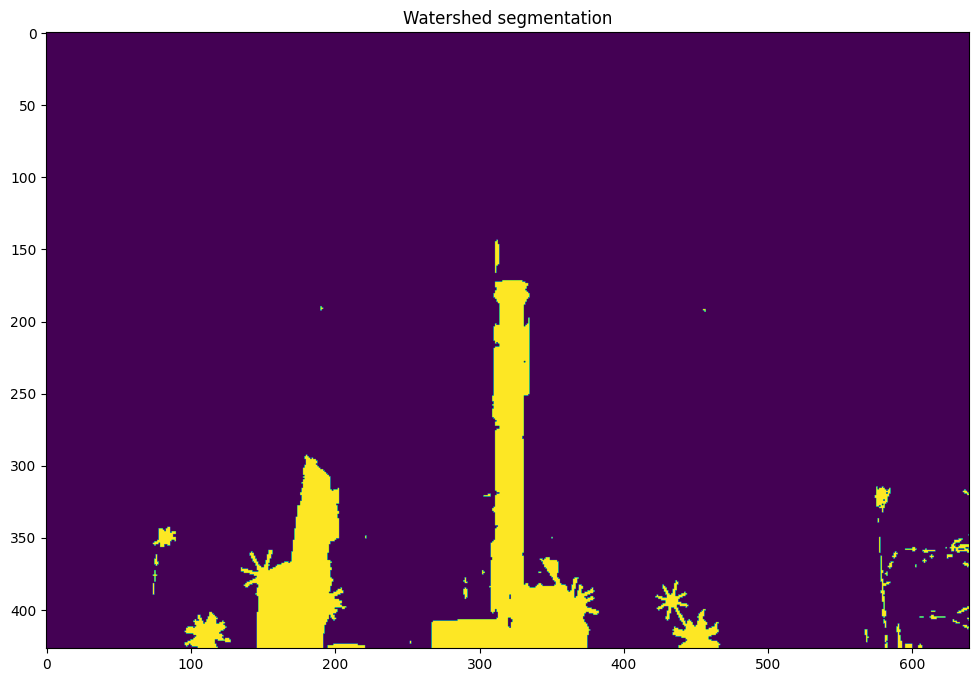

In [23]:
# Perform watershed region segmentation
segmentation = watershed(elevation_map, markers)

plt.imshow(segmentation)
plt.title('Watershed segmentation')

In [25]:
# plot overlays and contour
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)

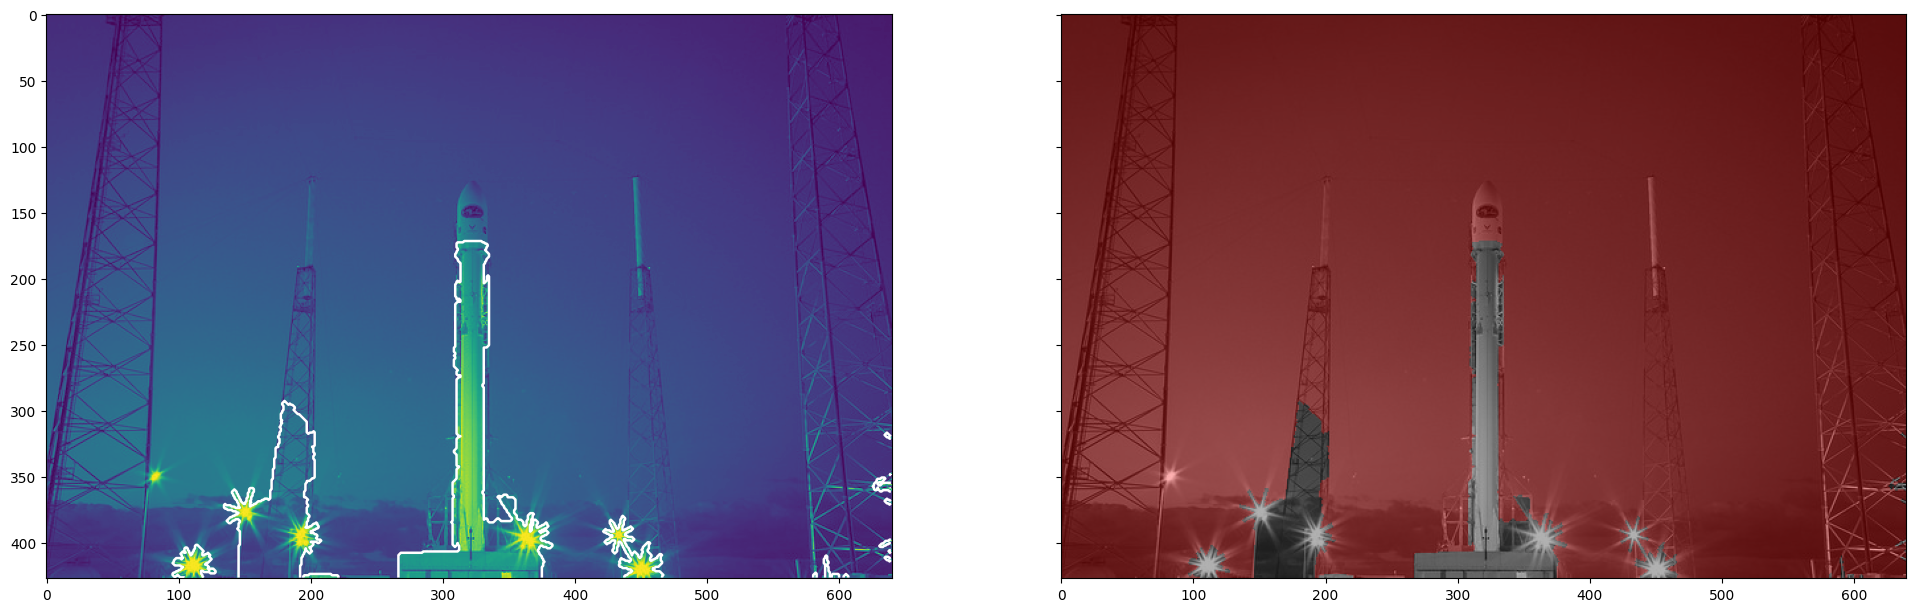

In [29]:
# overlay image with different labels
image_label_overlay = label2rgb(label_rock, image=rocket_wh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)